## Đại học Kinh tế thành phố Hồ Chí Minh

Bộ môn: Kinh tế lượng tài chính

GVHD: TS. Nguyễn Thị Hồng Nhâm

Học viên: Trần Nhật Trường. Mã số: 212111136

## Chủ đề 2: Đánh giá Cú sốc Môi trường tác động đến vấn đề Tăng trưởng kinh tế của Việt Nam giai đoạn 2000 - 2022: Ứng dụng mô hình SVAR

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import svarlr
import pandas_datareader as pdr
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
series = pd.read_csv("SVAR.csv")

In [3]:
series

,Time,GDP,CO2
0,2000,9.352583e+10,0.547525
1,2001,9.931778e+10,0.571120
2,2002,1.055955e+11,0.629722
3,2003,1.128806e+11,0.628130
4,2004,1.213877e+11,0.700662
5,2005,1.305492e+11,0.707539
6,2006,1.396588e+11,0.679296
7,2007,1.496158e+11,0.702716
8,2008,1.580867e+11,0.743801
9,2009,1.666201e+11,0.793962


In [4]:
series.index = series.Time
series = series.drop(['Time'],axis=1)
series

,GDP,CO2
Time,,
2000,9.352583e+10,0.547525
2001,9.931778e+10,0.571120
2002,1.055955e+11,0.629722
2003,1.128806e+11,0.628130
2004,1.213877e+11,0.700662
2005,1.305492e+11,0.707539
2006,1.396588e+11,0.679296
2007,1.496158e+11,0.702716
2008,1.580867e+11,0.743801


<AxesSubplot:xlabel='Time'>

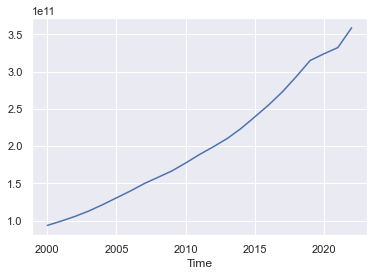

In [5]:
#Kiểm định tính dừng ở biến gốc
series['GDP'].plot()

<AxesSubplot:xlabel='Time'>

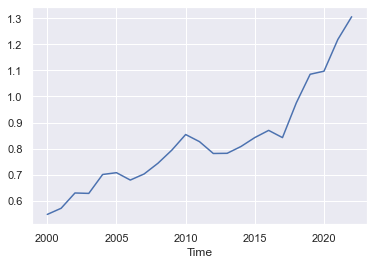

In [6]:
#Kiểm định tính dừng ở biến gốc
series['CO2'].plot()

## Xác định thứ tự của độ trễ và khoảng thời gian cho Hàm phản hồi xung. Đồng thời giới hạn khoảng thời gian được trực quan trong biểu đồ Cú sốc IRF.

In [7]:
p = 1       # order of VAR lag
nIR = 50    # number of periods for Impulse Response
nIRF = 5    # maximum periods shown in IRF graph

In [8]:
[b, Sig, B] = svarlr.varlr(series,p) # VAR of order 'p'

Theo [Blanchard-Quah (1989)]

Mô hình SVAR cung cấp ba đối tượng:

     b: Là vectơ hệ số VAR [A0,A1,...,Ap].
     Sig: Là ma trận phương sai- hiệp phương sai của sai số.
     B: Là ma trận biến đổi cấu trúc được tính toán với những kiểm soát được áp đặt trong dài hạn.

Hàm cú sốc IRF nhận ba yếu tố:

     b: Các hệ số VAR ước lượng ở trên.
     B: Ma trận cấu trúc cho phần Error.
     nIR: Số chu kỳ của IRF.

In [9]:
IRF = svarlr.irflr(b,B,nIR) # Impulse response (or MA coefficients)

Hàm Cú sốc IRF gồm:

Thời kỳ xảy ra cú sốc IRF (Trong phân tích này được xác định là những cú sốc môi trường, được biểu thị thông qua những biến động lớn trong mức phát thải CO2 của một quốc gia)

Giá trị Correlation nhận phản ứng xung (Impulse Response) của VAR và trả về các hệ số tương quan.

In [10]:
corr = svarlr.cor(IRF) # Correlations
print(corr)

[[0.97709048 0.99199207 0.669779  ]]


Để xác định được phản ứng xung của GDP, bài phân tích tiến hành lấy sai phân thông qua dGDP.

In [11]:
IRF = np.vstack([(IRF[0,:].cumsum()),
                 (IRF[1,:].cumsum()),
                 (IRF[2,:].cumsum()),
                 (IRF[3,:].cumsum())])

In [12]:
Sim = 1000 # The number of bootstrap iterations

corr_b = []
IRF1 = []
IRF2 = []
IRF3 = []
IRF4 = []
srrsim = []

In [13]:
for i in range(1,Sim+1):
    series_b = svarlr.bootstrap(series,p,len(series)+30) # Pseudo Series generated
    b_b,Sig_b,B_b = svarlr.varlr(series_b, p)
    IRF_b = svarlr.irflr(b_b,B_b,nIR)
    ith_cor = svarlr.cor(IRF_b)
    IRF1.append(IRF_b[0,:].cumsum()[np.newaxis])
    IRF2.append(IRF_b[1,:].cumsum()[np.newaxis])
    IRF3.append(IRF_b[2,:].cumsum()[np.newaxis])
    IRF4.append(IRF_b[3,:].cumsum()[np.newaxis])

IRF1 = np.vstack(IRF1)
IRF2 = np.vstack(IRF2)
IRF3 = np.vstack(IRF3)
IRF4 = np.vstack(IRF4)

In [14]:
band1 = svarlr.band(IRF1,.90);
band2 = svarlr.band(IRF2,.90);
band3 = svarlr.band(IRF3,.90);
band4 = svarlr.band(IRF4,.90);

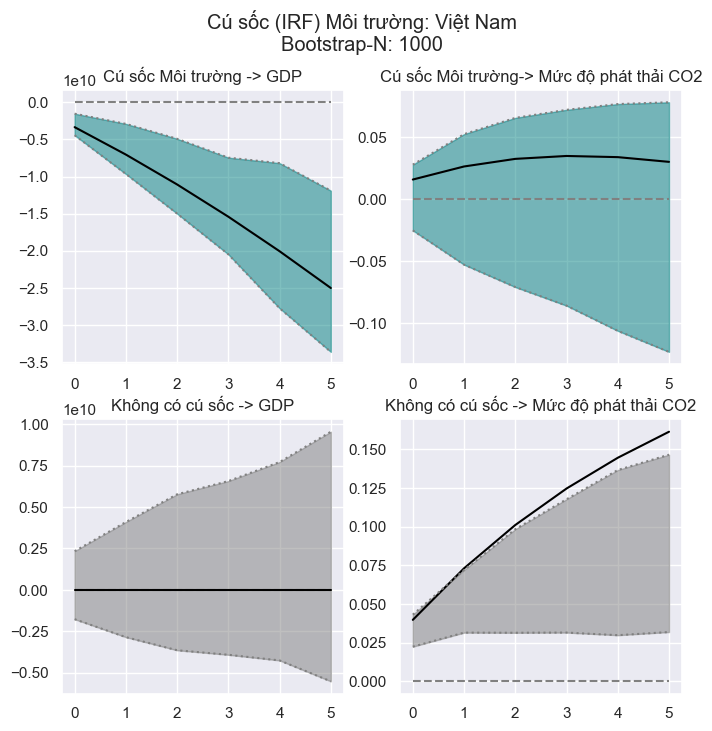

In [15]:
df_IRF = pd.DataFrame(IRF)

# First transpose the df. 
df_IRF = df_IRF.T
col_names = ['Cú sốc Môi trường -> GDP', 'Cú sốc Môi trường -> Mức độ phát thải CO2','Không có cú sốc -> Mức độ phát thải CO2','Không có cú sốc -> GDP']
df_IRF.columns = col_names

# Define graphic settings
t = nIRF+1
fig_size = (8, 8)
fig_dpi = 100 

# Build the plots
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=fig_size, dpi=fig_dpi)
fig.suptitle("Cú sốc (IRF) Môi trường: Việt Nam\nBootstrap-N: {}".format(Sim))

# Biểu đồ 01: Cú sốc Môi trường tác động đến GDP
df_IRF.iloc[:t,0].plot(ax=axes[0,0], color='black'); axes[0,0].set_title('Cú sốc Môi trường -> GDP')
axes[0,0].plot(band1.T[:t,:], color='gray',linestyle='dotted')
axes[0,0].plot(np.ones([t,1]), color='gray',linestyle='dashed')
axes[0,0].fill_between(np.arange(0,t,1),band1[0,:t], band1[1,:t],color='teal',alpha=0.5)

# Biểu đồ 02: Cú sốc Môi trường tác động đến Mức độ phát thải khí CO2
df_IRF.iloc[:t,1].plot(ax=axes[0,1], color='black'); axes[0,1].set_title('Cú sốc Môi trường-> Mức độ phát thải CO2')
axes[0,1].plot(band2.T[:t,:], color='gray',linestyle='dotted')
axes[0,1].plot(np.zeros([t,1]), color='gray',linestyle='dashed')
axes[0,1].fill_between(np.arange(0,t,1),band2[0,:t], band2[1,:t],color='teal',alpha=0.5)

# Biểu đồ 03: Không tồn tại cú sốc Môi trường tác động đến GDP
df_IRF.iloc[:t,3].plot(ax=axes[1,1], color='black'); axes[1,1].set_title('Không có cú sốc -> Mức độ phát thải CO2')
axes[1,0].plot(band3.T[:t,:],color='gray',linestyle='dotted')
axes[1,0].plot(np.ones([t,1]),color='gray',linestyle='dashed')
axes[1,0].fill_between(np.arange(0,t,1),band3[0,:t], band3[1,:t],color='gray',alpha=0.5)

# Biểu đồ 04: Không tồn tại cú sốc Môi trường tác động đến Mức độ phát thải khí CO2
df_IRF.iloc[:t,3].plot(ax=axes[1,0], color='black'); axes[1,0].set_title('Không có cú sốc -> GDP')
axes[1,1].plot(band4.T[:t,:], color='gray',linestyle='dotted')
axes[1,1].plot(np.zeros([t,1]), color='gray',linestyle='dashed')
axes[1,1].fill_between(np.arange(0,t,1),band4[0,:t], band4[1,:t],color='gray',alpha=0.5)


plt.show()

In [16]:
fig.savefig('chart.jpg')

## Nhận định (Causality)

Biểu đồ trên thể hiện mối quan hệ nhân quả tuyến tính giữa nhiều chuỗi thời gian, trong trường hợp này là mức độ phát thải khí CO2 và thu nhập GDP của Việt Nam giai đoạn 2000 - 2022

<AxesSubplot:xlabel='Time'>

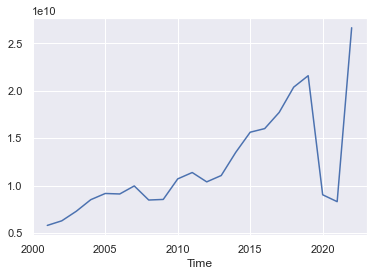

In [17]:
# Tiến hành kiểm định tính dừng ở Sai phân bậc 1
seriesd1=series.diff()
seriesd1['GDP'].plot()

<AxesSubplot:xlabel='Time'>

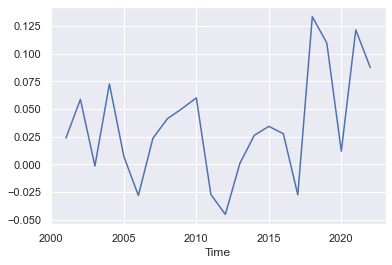

In [18]:
# Tiến hành kiểm định tính dừng ở Sai phân bậc 1
seriesd1['CO2'].plot()